In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./cs-construction.csv", index_col="Unnamed: 0")
df.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85414,0,0.151415,60,0,0.349790,5711.0,11,0,0,0,0.0
126131,0,0.000564,56,0,0.043997,15000.0,11,0,0,0,1.0
68845,0,0.017796,85,0,0.000632,3166.0,1,0,0,0,1.0
13050,0,0.018540,64,0,0.002203,13160.0,5,0,0,0,1.0
8974,0,0.012984,32,1,0.126452,3700.0,6,0,0,0,0.0
43022,0,0.000000,31,0,0.350680,1690.0,7,0,0,0,0.0
3850,0,0.044773,57,0,0.464220,7084.0,14,0,2,0,0.0
131356,0,0.000000,58,0,0.451785,6916.0,8,0,2,0,0.0
145637,1,1.000000,29,0,0.018178,4400.0,1,2,0,0,1.0
38508,0,1.009948,39,1,0.241648,3980.0,13,1,0,3,1.0


In [3]:
# Cargar diccionario
pd.options.display.max_colwidth = None 
dicc = pd.read_excel("./cs-Data Dictionary.xls", skiprows=1)
dicc

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [7]:
print(df.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [39]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.groupby("age")["MonthlyIncome"].agg(['mean', 'count'])

,mean,count
age,,
0,6000.000000,1
21,1128.123077,130
22,1312.592705,329
23,1728.003883,515
24,2061.717791,652
25,2529.139272,797
26,2890.903162,1012
27,3247.634991,1126
28,3605.198666,1349


In [43]:
df[df["MonthlyIncome"].isna()].sample(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
82121,1,1.000000,54,0,114.0,NaN,0,2,0,0,0.0
83336,0,0.000710,76,0,603.0,NaN,6,0,1,0,0.0
92440,0,0.123915,43,0,4317.0,NaN,6,0,2,0,1.0
3726,0,0.107608,76,0,2889.0,NaN,17,0,2,0,0.0
35013,0,0.337303,44,0,627.0,NaN,5,0,0,0,0.0
58874,0,0.053230,48,1,2249.0,NaN,11,0,2,1,0.0
124285,0,1.000000,36,0,1274.0,NaN,1,0,1,0,0.0
61779,0,0.020633,74,1,43.0,NaN,7,0,0,1,0.0
57755,0,0.486460,44,0,761.0,NaN,6,0,1,0,0.0
142805,0,0.029812,93,0,32.0,NaN,11,0,0,0,0.0


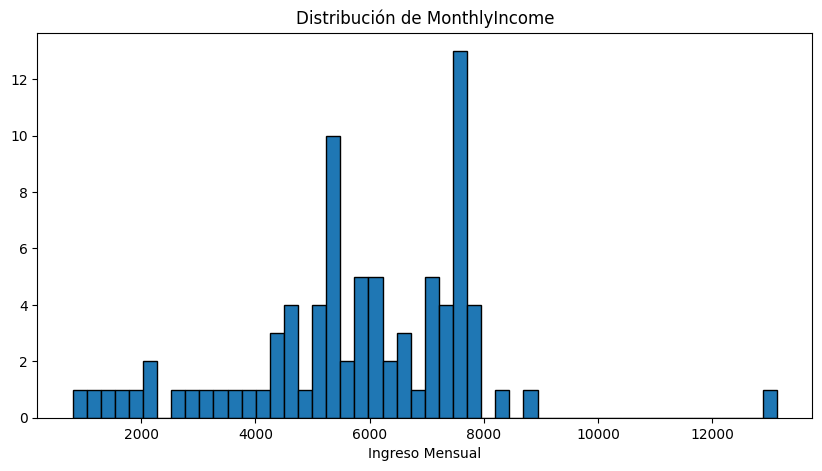

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(df.groupby("age")["MonthlyIncome"].mean(), bins=50, edgecolor='k')
plt.title('Distribución de MonthlyIncome')
plt.xlabel('Ingreso Mensual')
plt.show()